In [304]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import os

evalStates = torch.load("../Results/Evaluation_States_real.pt",weights_only=True)
print(evalStates.shape)

torch.Size([32, 16])


In [305]:
init_joint_pos = evalStates[:,:6].cpu().numpy()
targetPos = evalStates[:,6:9].cpu().numpy()

# save the joint positions to a file
np.savetxt(os.path.join("../Results", "initJointPos.txt"), init_joint_pos, delimiter=",")
np.savetxt(os.path.join("../Results", "targetPos.txt"), targetPos, delimiter=",")


In [306]:
ResultsDir = "../Results/logs"
target = "WoodBlock"
trajs = os.listdir(os.path.join(ResultsDir, target))
# order trajs:
trajs.sort(key=lambda x: int(x.split("_")[1].split(".")[0]))

trajs_id = [int(trajs[i][4:6]) for i in range(len(trajs))]
print(trajs_id)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [307]:
id = 3
dataPath = f"{ResultsDir}/{target}/{trajs[id]}/data.npz"
print(f"Loading data from {dataPath}")
data = np.load(dataPath)


Loading data from ../Results/logs/WoodBlock/run_03_2025-05-01_04-26-36/data.npz


In [308]:
# view the data keys of npz file
print(data.files)
xs = data["xs"]


['sim_timestep', 'duration', 'ctrl_timestep', 'object_names', 'nq', 'nv', 'nx', 'nu', 'ts', 'us', 'xs', 'xds', 'uds', 'r_ew_ws', 'Q_wes', 'v_ew_ws', 'ω_ew_ws', 'cmd_vels', 'r_ow_ws', 'Q_wos', 'r_ew_w_ds', 'Q_we_ds', 'solve_times', 'cost', 'contact_forces', 'object_dynamics_constraints']


(1501, 18)


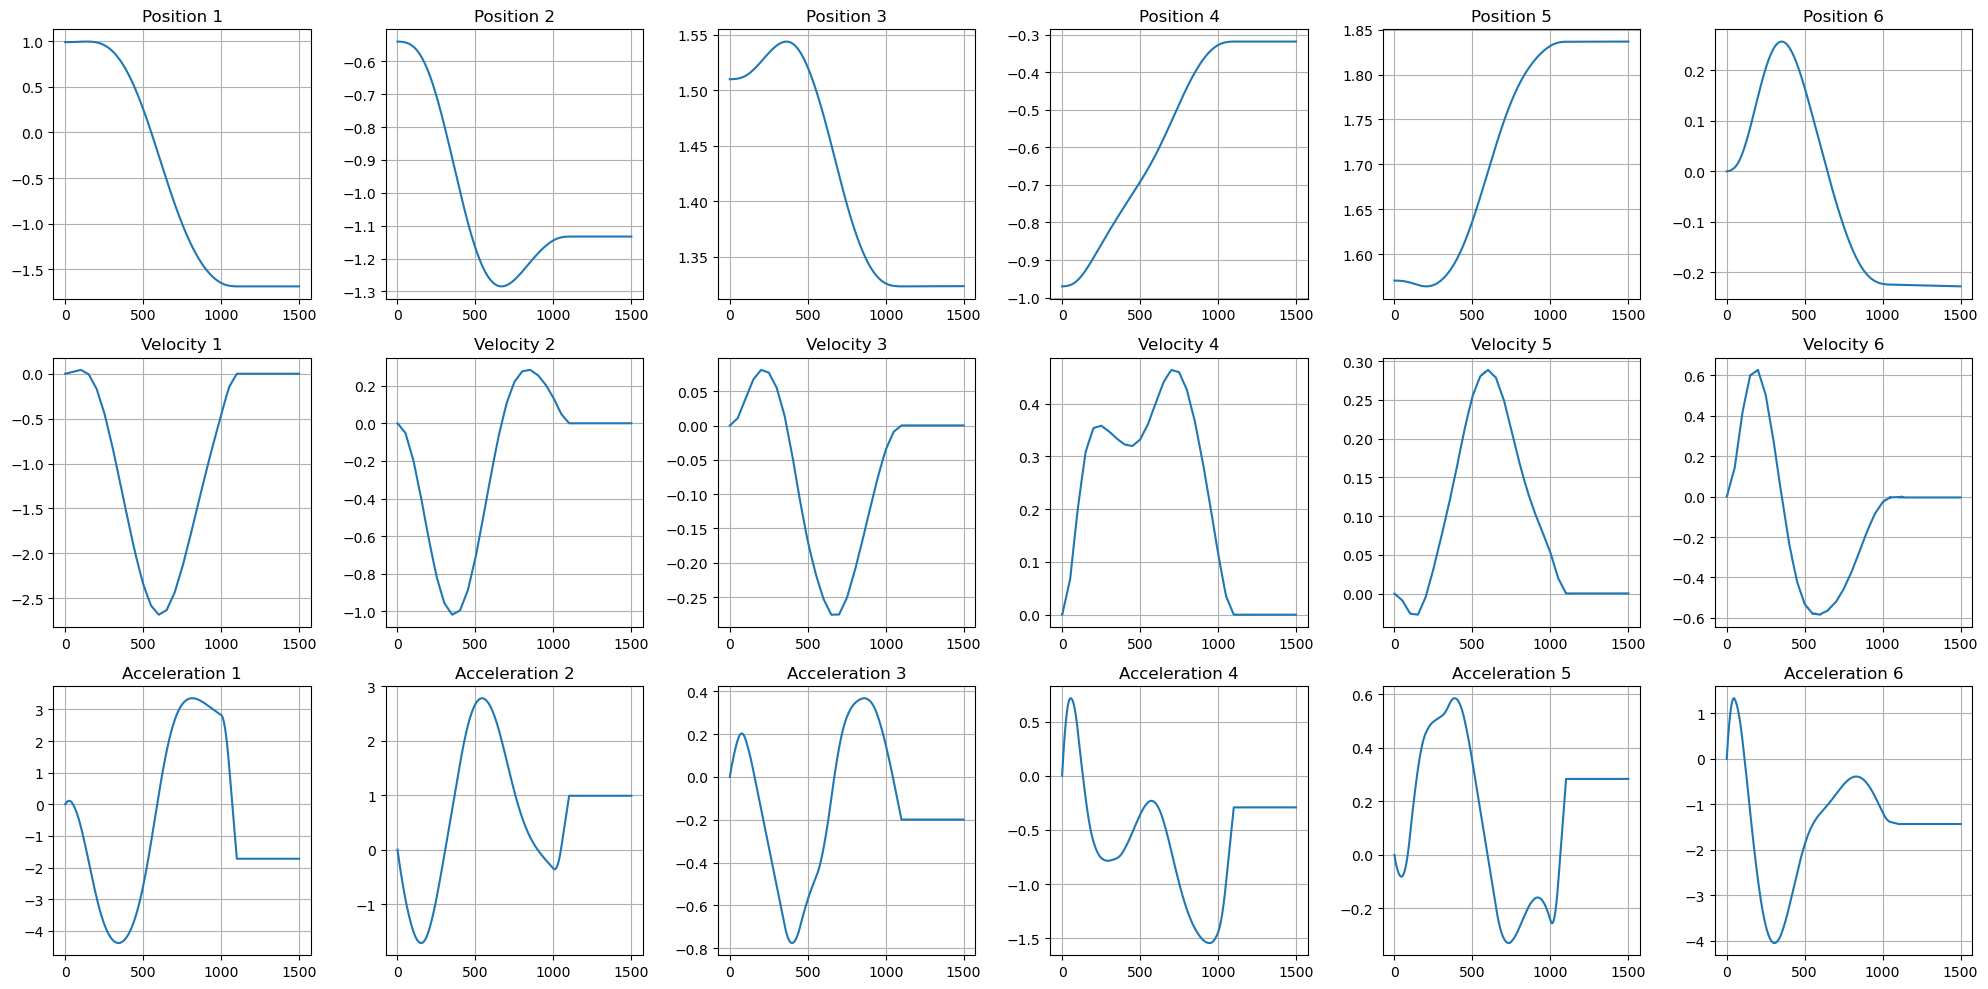

In [309]:
print(xs.shape)
xPos = xs[:, :6]
xVel = xs[:, 6:12]
xAcc = xs[:, 12:18]

# Create a 3x6 grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 10))

# Plot position data
for i in range(6):
    axes[0,i].plot(xPos[:,i])
    axes[0,i].set_title(f'Position {i+1}')
    axes[0,i].grid(True)

# Plot velocity data
for i in range(6):
    axes[1,i].plot(xVel[:,i])
    axes[1,i].set_title(f'Velocity {i+1}')
    axes[1,i].grid(True)

# Plot acceleration data
for i in range(6):
    axes[2,i].plot(xAcc[:,i])
    axes[2,i].set_title(f'Acceleration {i+1}')
    axes[2,i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

(1501, 3)
Error: 0.003979793491590543


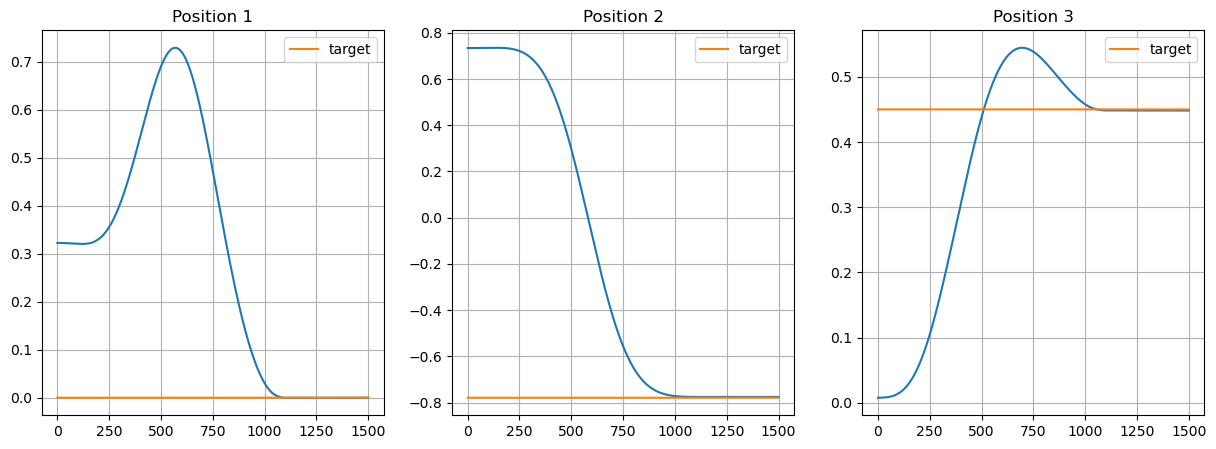

In [310]:
#
r_ew_ws = data["r_ew_ws"]
print(r_ew_ws.shape)
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot position data
for i in range(3):
    axes[i].plot(r_ew_ws[:,i])
    axes[i].set_title(f'Position {i+1}')
    axes[i].grid(True)

t = np.arange(r_ew_ws.shape[0])
tgtPos = targetPos[trajs_id[id]]
for i in range(3):
    axes[i].plot(t, tgtPos[i]*np.ones(r_ew_ws.shape[0]), label="target")
    axes[i].set_title(f'Position {i+1}')
    axes[i].grid(True)
    axes[i].legend()
error = np.linalg.norm(r_ew_ws[-1] - tgtPos)
print(f"Error: {error}")

In [311]:
SuccessfulRuns = []
for i in range(len(trajs)):
    dataPath = f"{ResultsDir}/{target}/{trajs[i]}/data.npz"
    data = np.load(dataPath)
    r_ew_ws = data["r_ew_ws"]
    error = np.linalg.norm(r_ew_ws[-1] - targetPos[trajs_id[i]])
    if error > 10e-2:
        print(f"Failed Run {i} with error {error}")
    else:
        SuccessfulRuns.append(i)

SR = len(SuccessfulRuns)/32*100
print(f"Success Rate: {SR}%")
print(f"Successful Runs: {SuccessfulRuns}")

Failed Run 4 with error 0.9181475451918053
Failed Run 23 with error 1.0729999208102043
Success Rate: 93.75%
Successful Runs: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31]


In [312]:
JointPos = []
for i in range(len(SuccessfulRuns)):
    dataPath = f"{ResultsDir}/{target}/{trajs[SuccessfulRuns[i]]}/data.npz"
    data = np.load(dataPath)
    JointPos.append(data["xs"][:,:6])
JointPos = np.array(JointPos)
print(JointPos.shape)

np.save("../Results/logsPos/JointPos.npy", JointPos)


(30, 1501, 6)


Text(0.5, 1.0, 'Norm Velocity')

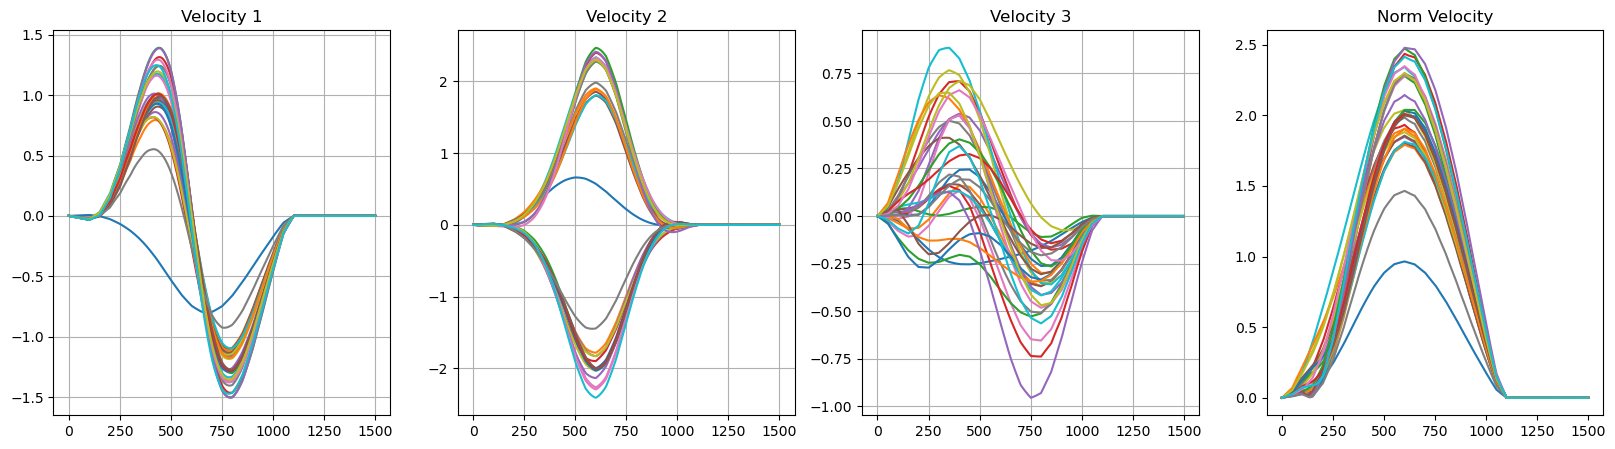

In [313]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i in range(len(SuccessfulRuns)):
    dataPath = f"{ResultsDir}/{target}/{trajs[SuccessfulRuns[i]]}/data.npz"
    data = np.load(dataPath)

    v_ew_w = data["v_ew_ws"]
    norm_v_ew_w = np.linalg.norm(v_ew_w, axis=1)
# plot

    # Plot position data
    for i in range(3):
        axes[i].plot(v_ew_w[:,i])
        axes[i].set_title(f'Velocity {i+1}')
        axes[i].grid(True)

    # Plot norm
    axes[3].plot(norm_v_ew_w)
axes[3].set_title(f'Norm Velocity')
